In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import CubicHermiteSpline

from google.colab import drive
drive.mount('/content/drive')

house_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [ ]:
#a)

x = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression().fit(x, y)

#Hint: .fit()

coefficient of determination: 0.49670880166311393
Mean squared error: 57947526161.288376


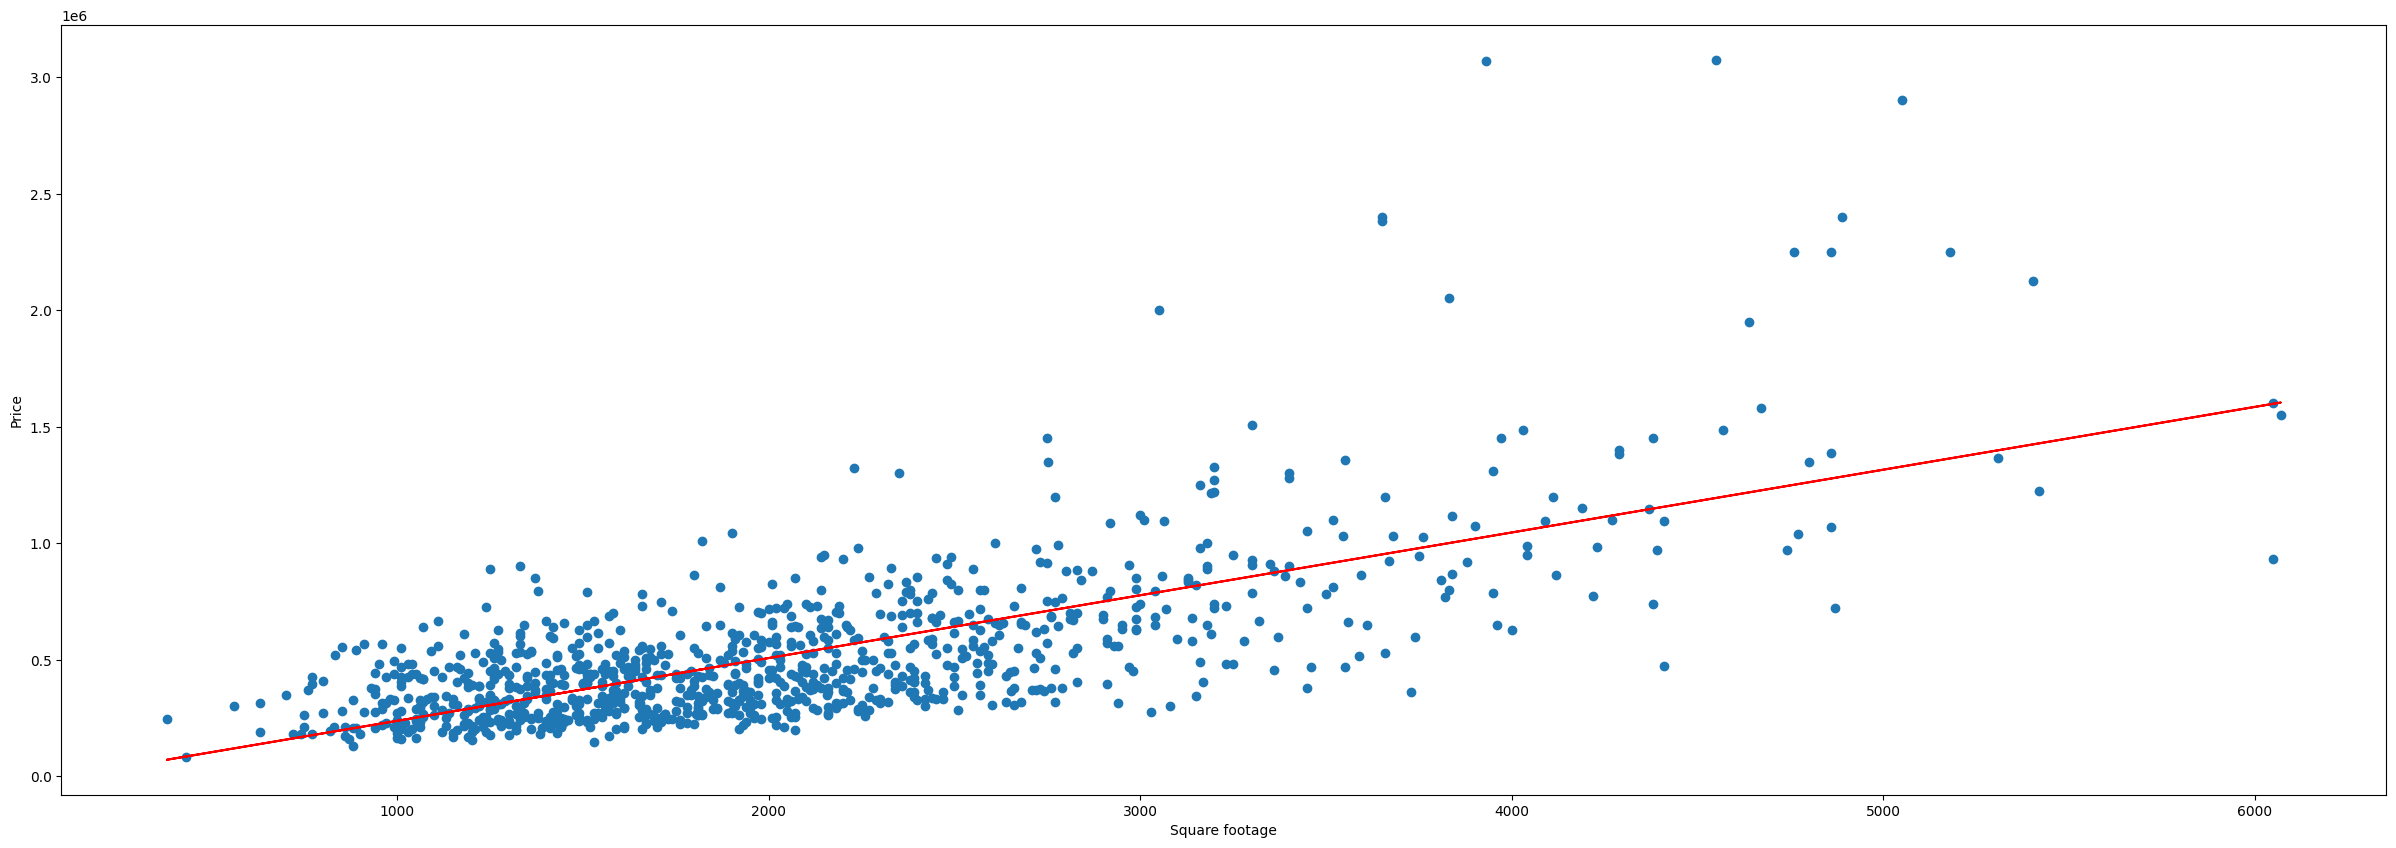

In [ ]:
#b)

plt.figure(figsize = (30,10))
plt.scatter(x, y)
plt.xlabel("Square footage")
plt.ylabel("Price")
plt.plot(x, (x*model.coef_ + model.intercept_), "r")

det_coef = model.score(x, y)
print(f"coefficient of determination: {det_coef}")
print("Mean squared error:", mean_squared_error(y, (x*model.coef_+model.intercept_)))

plt.show()

#model._intercept - intercept (b0)
#model.coef - slope (b1)

#Both coefficient of determination and mean square error indicate that this linear regression doesnt fit the dataset that well.
#It might be caused by the fact that linear function is too simple and that there is no straight corelation between footage and price of apartment (bigger appartments not necesserily has to be expensive and the opposite).


#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

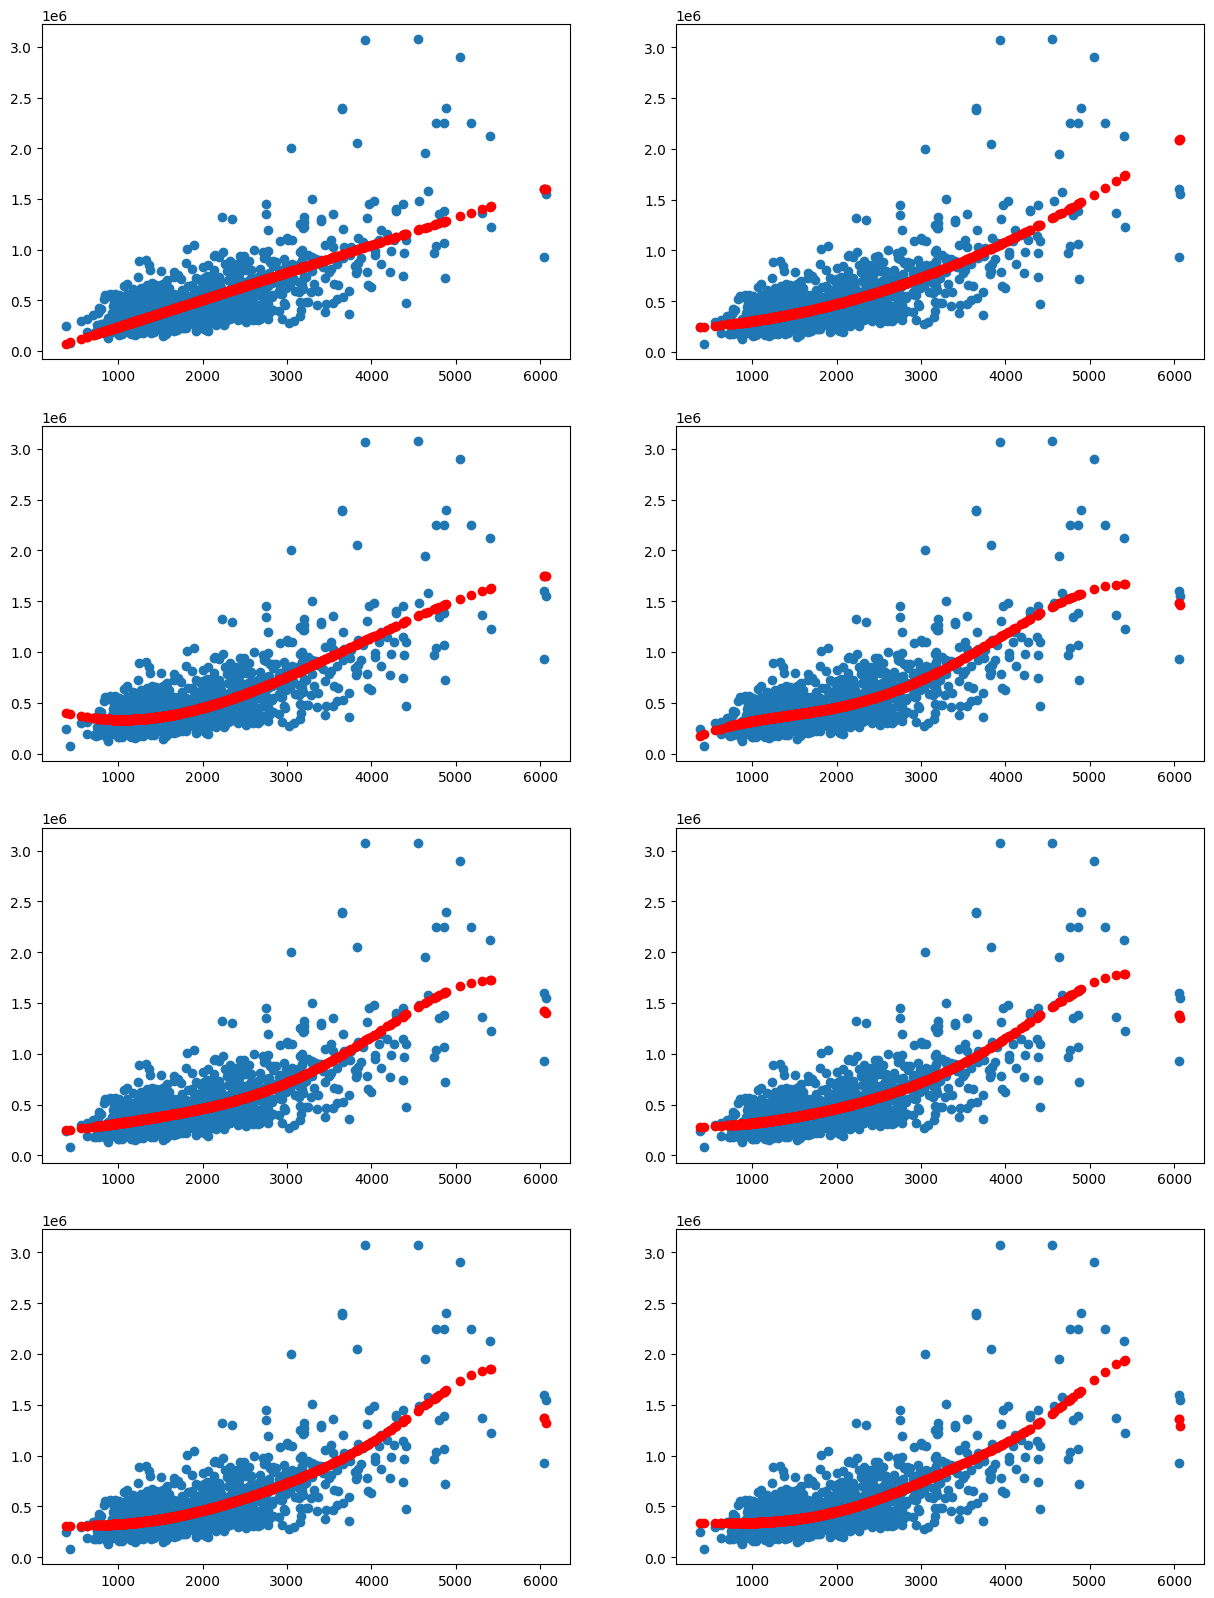

In [ ]:
#c)
mean = []
plt.figure(figsize = (15,20))

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    x_order = poly.fit_transform(x)

    model = LinearRegression().fit(x_order, y)
    y_pred = model.predict (x_order)

    ax = plt.subplot(4, 2, order)
    ax = plt.scatter(x, y)
    ax = plt.scatter(x, y_pred, color="red")
    mean.append(mean_squared_error(y, y_pred))
    #dlaczego plot dziwnie się zachowuje?

#We can notice that the higher polynomial degree, the better model fits the data. We expect error to decrease, too.

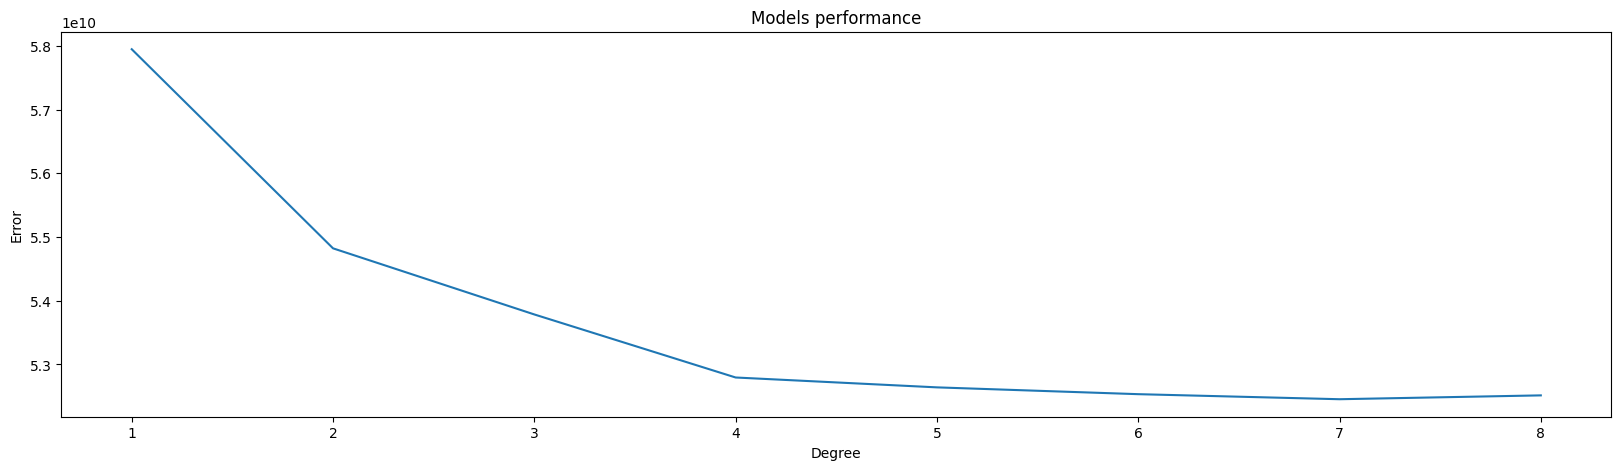

In [ ]:

degree = [1,2,3,4,5,6,7,8]
plt.figure(figsize = (20,5))
plt.xlabel("Degree")
plt.ylabel("Error")
plt.title("Models performance")
plt.plot(degree, mean)

#We can notice that the higher degree of polynomial, the smaller error is, but fitting has its limits and for this particular case it ends about 6/7 degree where function flattens.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

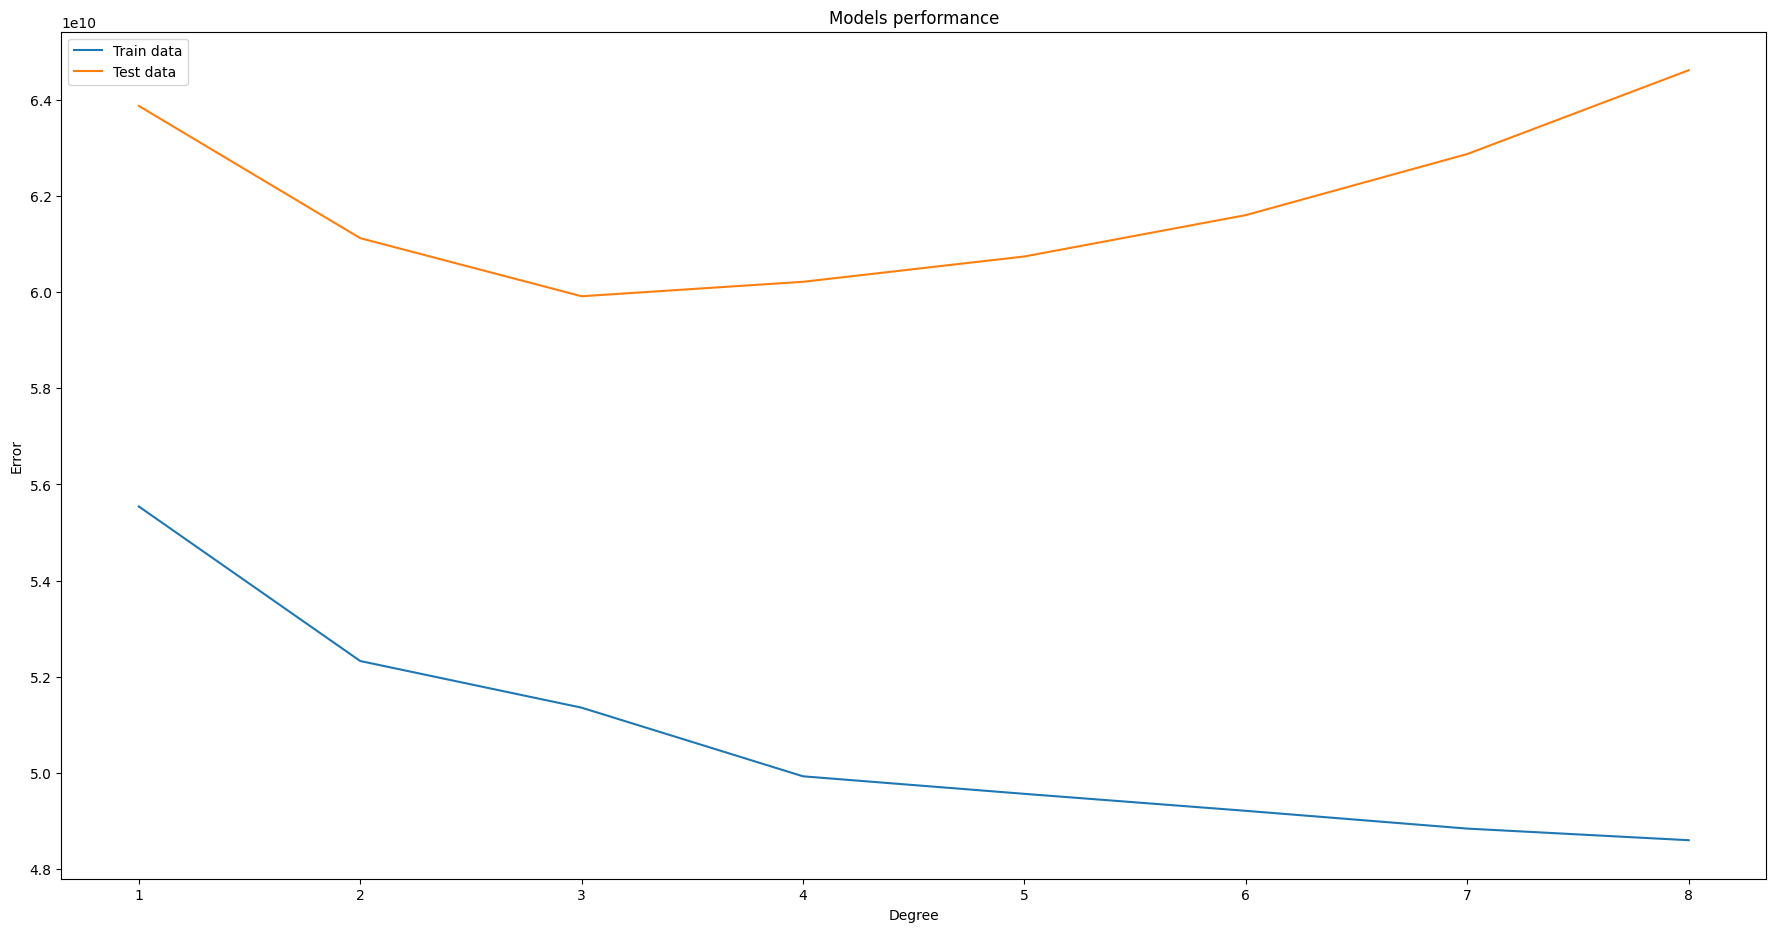

In [ ]:
#a)
train_errors = []
test_errors = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    x_order = poly.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x_order, y, test_size=0.3, random_state=44)

    model = LinearRegression().fit(x_train, y_train)
    y_pred = model.predict (x_train)
    train_errors.append(mean_squared_error(y_train, y_pred))

    y2_pred = model.predict (x_test)
    #checking how good our model is on the test data
    test_errors.append(mean_squared_error(y_test, y2_pred))

plt.figure(figsize = (22,11))
plt.xlabel("Degree")
plt.ylabel("Error")
plt.title("Models performance")
plt.plot(degree, train_errors, label = "Train data")
plt.plot(degree, test_errors, label = "Test data")

plt.legend(loc="upper left")

#While for the train data error keeps decreasing (as expected, becouse we try to fit the model better and better with more degrees of polynomial) the results for test data show that best fit for it is about 3-degree
#polynomial, more specific fits make the error bigger - its caused by the fact that we fit the functions to anomalies, which dont represent well real corelations.


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

coefficient of determination: 0.49670880166311404
Mean squared error: 396407.1889615157


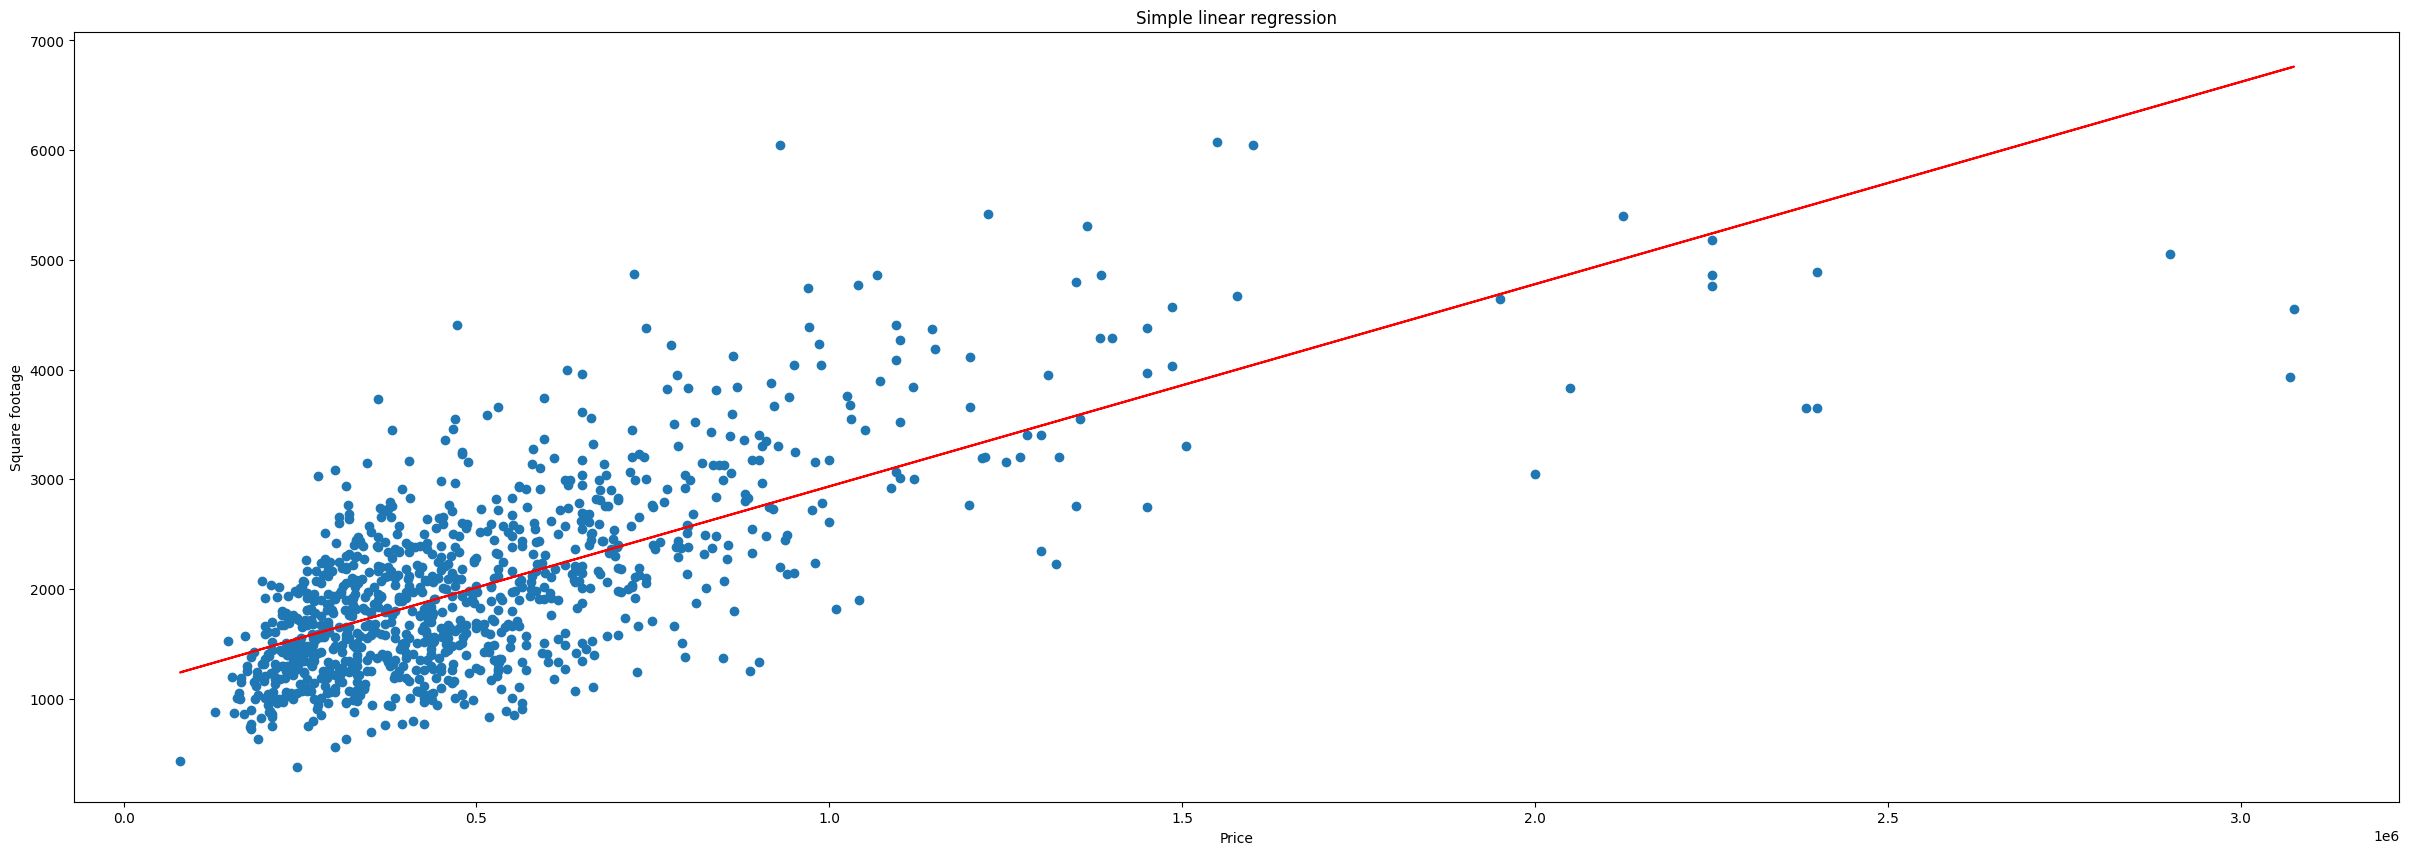

In [ ]:
#a)

x = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model = LinearRegression().fit(x, y)

plt.figure(figsize = (30,10))
plt.scatter(x, y)
plt.ylabel("Square footage")
plt.xlabel("Price")
plt.title("Simple linear regression")
plt.plot(x, (x*model.coef_ + model.intercept_), "r")

det_coef = model.score(x, y)
print(f"coefficient of determination: {det_coef}")
print("Mean squared error:", mean_squared_error(y, (x*model.coef_+model.intercept_)))

plt.show()


In [ ]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
#(1)
#Changing proportions of test data size to training data size, we can decrease error from 48749267368.97092 to 45179288671.084045 (7.5%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error for second model equals: {0}".format(mean_squared_error(y_pred, y_test)))

#(2)
#Adding two more features - year when house was built and year when it was renovated, we can decrease error from 48749267368.97092 to 42216577585.05316 (13.5%)
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'yr_built', 'yr_renovated']].values.reshape(-1,6)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error for third equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749267368.97092
Mean squared error for second model equals: 45179288671.084045
Mean squared error for third equals: 42216577585.05316
